In [1]:
import pandas as pd
import numpy as np

In [2]:
pokemon = pd.read_csv('https://raw.githubusercontent.com/KillianPitiot/DS-evaluation-2020/master/pokemon.csv')
combats = pd.read_csv('https://raw.githubusercontent.com/KillianPitiot/DS-evaluation-2020/master/combats.csv')

In [12]:
pokemon.head(5)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# 
# Task 1
# 

In [6]:
pokemon.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [7]:
pokemon.columns

Index(['pid', 'Name', 'Class 1', 'Class 2', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary'],
      dtype='object')

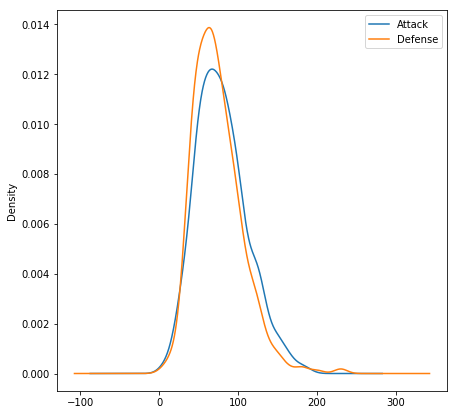

In [198]:
pokemon[['Attack','Defense']].plot(kind='kde',figsize=(7,7))

In [45]:
pokemon[['Class 1']].groupby(['Class 1'])['Class 1'].count()

Class 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: Class 1, dtype: int64

In [38]:
pokemon[['Class 1']].describe()

,Class 1
count,800
unique,18
top,Water
freq,112


In [42]:
pokemon[['Class 2']].groupby(['Class 2'])['Class 2'].count()

Class 2
Bug          3
Dark        20
Dragon      18
Electric     6
Fairy       23
Fighting    26
Fire        12
Flying      97
Ghost       14
Grass       25
Ground      35
Ice         14
Normal       4
Poison      34
Psychic     33
Rock        14
Steel       22
Water       14
Name: Class 2, dtype: int64

In [40]:
pokemon[['Class 2']].describe()

,Class 2
count,414
unique,18
top,Flying
freq,97


Conclusion: pokemon dataset counts 800 sample points, most popular class 1 is Water, which occurs in 112 cases. Most popular class 2 is Flying, which occurs in 97 cases, however there is almost 50% of values is missing in class 2 column. number of unique classes in both columns are 18. Attack and Defense variables both have normal or normal-like distribution. Mean value of Attack is 79.001250, Defense - 73.842500.
The 'bells' of distribution are pulled towards top, with light ends.

# 
# Task 2
# 

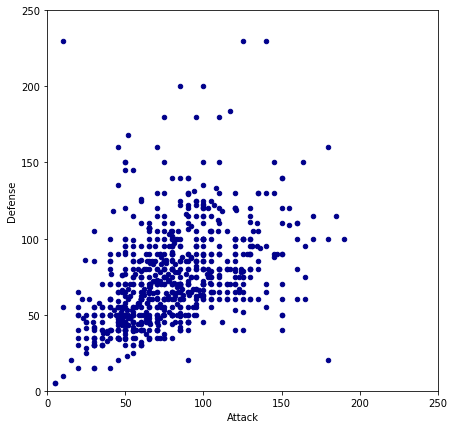

In [197]:
pokemon[['Attack','Defense']].plot.scatter(x='Attack',
                      y='Defense',
                      c='DarkBlue',figsize=(7,7), xlim=(0,250), ylim=(0,250))

Looking at this visualisation, i could observe, that most of points are located inside ellipse cloud, which is tilted towards Ox axis at 45 degrees. So it could be, that statistical dependence between two variable is weak or abcent.

Lets add some variables to df, based on information we already know:

Atk/Def rank - ranking of 'Atk/Def Ratio' characteristic. 1 there means, that this pokemon has the best Atk/Def Ratio in relation to other pokemons. Pokemons with the same 'Atk/Def Ratio' have the same Atk/Def rank. Rank always increases by 1 between 2 closest different Atk/Def Ratio values.

Atk rank - ranking of 'Attack' characteristic. 1 there means, that this pokemon has the best Attack characteristic in relation to other pokemons.

Def rank - ranking of 'Defense' characteristic. 1 there means, that this pokemon has the best Defense characteristic in relation to other pokemons.

Winner - how many battles pokemon won in combats df (0 means that he won 0 battles OR participated in 0 battles)

probably these variables will help us in future analysis

In [81]:
pokemon['Atk/Def Ratio']=pokemon['Attack']/pokemon['Defense']
pokemon['Atk/Def rank']=pokemon['Atk/Def Ratio'].rank(method ='dense',ascending=False)
pokemon['Atk rank']=pokemon['Attack'].rank(method ='dense',ascending=False)
pokemon['Def rank']=pokemon['Defense'].rank(method ='dense',ascending=False)


wins_count = combats.groupby(['Winner'])['Winner'].count()

pokemon=pokemon.merge(wins_count, how='left', left_on='pid', right_on=wins_count.index)
pokemon['Winner'].fillna(value=0, inplace=True)

In [84]:
pokemon.head(12)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Atk/Def Ratio,Atk/Def rank,Atk rank,Def rank,Winner
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,1.000000,223.0,87.0,80.0,37.0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,0.984127,226.0,74.0,66.0,46.0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,0.987952,225.0,54.0,48.0,89.0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,0.813008,292.0,38.0,17.0,70.0
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,1.209302,163.0,84.0,85.0,55.0
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,False,1.103448,189.0,72.0,71.0,64.0
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,False,1.076923,195.0,52.0,52.0,115.0
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,False,1.171171,169.0,18.0,26.0,119.0
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,False,1.333333,130.0,35.0,52.0,114.0
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False,0.738462,323.0,88.0,64.0,19.0


In [61]:
# the names of the 3 Pokémon with highest attack-over-defense ratio:
pokemon.sort_values(['Atk/Def Ratio'], ascending=False).head(3)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Atk/Def Ratio,Atk/Def rank,Atk rank,Def rank,Winner
429,430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,True,9.00,1.0,3.0,100.0,121.0
347,348,Carvanha,Water,Dark,45,90,20,65,20,65,False,4.50,2.0,46.0,100.0,66.0
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False,3.75,3.0,9.0,88.0,115.0


In [83]:
# the names of the 3 Pokémon with lowest attack-over-defense ratio:
pokemon.sort_values(['Atk/Def Ratio'], ascending=False).tail(3)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Atk/Def Ratio,Atk/Def rank,Atk rank,Def rank,Winner
484,485,Bronzor,Steel,Psychic,57,24,86,24,86,23,False,0.279070,397.0,105.0,45.0,14.0
139,140,Magikarp,Water,NaN,20,10,55,15,20,80,False,0.181818,398.0,110.0,74.0,25.0
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,False,0.043478,399.0,110.0,1.0,0.0


In [73]:
#  the names of the 10 Pokémon with the largest number of victories (10th and 11th has the same amount of wins):
pokemon.sort_values(['Winner'], ascending=False).head(11)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Atk/Def Ratio,Atk/Def rank,Atk rank,Def rank,Winner
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,1.222222,158.0,29.0,41.0,152.0
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False,1.615385,68.0,34.0,64.0,136.0
437,438,Infernape,Fire,Fighting,76,104,71,104,71,108,False,1.464789,93.0,35.0,58.0,136.0
427,428,Jirachi,Steel,Psychic,100,100,100,100,100,100,True,1.000000,223.0,38.0,35.0,134.0
313,314,Slaking,Normal,NaN,150,160,100,95,65,100,False,1.600000,72.0,7.0,35.0,133.0
431,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,True,1.055556,204.0,41.0,41.0,133.0
393,394,Mega Absol,Dark,NaN,65,150,60,115,60,115,False,2.500000,9.0,9.0,69.0,130.0
213,214,Murkrow,Dark,Flying,60,85,42,85,42,91,False,2.023810,25.0,51.0,86.0,130.0
248,249,Mega Houndoom,Dark,Fire,75,90,90,140,90,115,False,1.000000,223.0,46.0,41.0,128.0
426,427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,True,1.800000,42.0,3.0,35.0,127.0



# 
# Task 3
# 


In [145]:
# grass_or_rock df will only include pokemons of grass or rock classes

grass_or_rock = pokemon

grass_or_rock =grass_or_rock.loc[( (grass_or_rock['Class 1']=='Grass')&(grass_or_rock['Class 2']!='Rock') )|
                                 ( (grass_or_rock['Class 1']=='Rock')&(grass_or_rock['Class 2']!='Grass') )|
                                 ( (grass_or_rock['Class 1']!='Grass')&(grass_or_rock['Class 2']=='Rock') )|
                                 ( (grass_or_rock['Class 1']!='Rock')&(grass_or_rock['Class 2']=='Grass') )
                                 ]

In [146]:
 grass_or_rock

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Atk/Def Ratio,Atk/Def rank,Atk rank,Def rank,Winner
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,1.000000,223.0,87.0,80.0,37.0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,0.984127,226.0,74.0,66.0,46.0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,0.987952,225.0,54.0,48.0,89.0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,0.813008,292.0,38.0,17.0,70.0
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False,0.909091,253.0,86.0,74.0,9.0
49,50,Gloom,Grass,Poison,60,65,70,85,75,40,False,0.928571,248.0,71.0,59.0,28.0
50,51,Vileplume,Grass,Poison,75,80,85,110,90,50,False,0.941176,243.0,56.0,46.0,44.0
51,52,Paras,Bug,Grass,35,70,55,45,55,25,False,1.272727,147.0,66.0,74.0,13.0
52,53,Parasect,Bug,Grass,60,95,80,60,80,30,False,1.187500,165.0,41.0,50.0,30.0
75,76,Bellsprout,Grass,Poison,50,75,35,70,30,40,False,2.142857,20.0,61.0,92.0,23.0


In [156]:
grass = grass_or_rock.loc[( (grass_or_rock['Class 1']=='Grass')&(grass_or_rock['Class 2']!='Rock') )|
                ( (grass_or_rock['Class 1']!='Rock')&(grass_or_rock['Class 2']=='Grass') )
                ]
len(grass)

93

In [158]:
rock = grass_or_rock.loc[( (grass_or_rock['Class 1']=='Rock')&(grass_or_rock['Class 2']!='Grass') )|
                    ( (grass_or_rock['Class 1']!='Grass')&(grass_or_rock['Class 2']=='Rock') )
                 ]
len(rock)

56

 grass - 93 samples, rock - 56 , 149 - total

 As we assume, than the distribution of the regular attack feature is normal for all Pokémon classes, and samples 
 are inependentes, lets provide Student's t-test for independent samples
 x_i - grass pokemons sample points  (experimental group)
 y_i - rock pokemons sample points   (control group)

 Lets assume that Null Hypothesis (H_0) -  denote, that the mean grass pok. Attack score is the same as the mean rock pok.
 Attack score.
 Alternative Hypothesis (H_1) - denote, that the mean grass pok. Attack score is not equal the mean rock pok. Attack score

In [157]:
grass['Attack'].mean()

73.73118279569893

In [159]:
rock['Attack'].mean()

91.78571428571429

In [205]:
def sigma(x):
    summ=0
    for a in range(len(x)):
        summ = summ + np.square(x[a] - np.mean(x))
    return summ
        

In [227]:
def t_emp(x,y):
    t = (np.mean(x)-np.mean(y))/np.sqrt( (sigma(x) + sigma(y))/(len(x)+len(y)-2)*(1/len(x) + 1/len(y)) )
    return t

In [230]:
t_emp(grass['Attack'].values, rock['Attack'].values)

-3.729457582692065

t_critical for for p-values:

n_samp	  p=0,05	  p=0,01	 p=0,001
150	      1,976	      2,609	     3,357


|t_emp| = 3.729 > t_crit = 3,357



Conclusion: as results says, |t_emp| = 3.729 is higher than t_crit of any of p-values. And with high degreee of confidence,
i can say that we should reject Null Hypothesis (H_0) in favour of Alternative Hypothesis (H_1) - the mean grass pok. Attack score is not equal the mean rock pok. Attack score. T-test shows, than results of sample points in experimental group are better than those in control group.
So, Professor Oak was right - Pokémon in the grass class have a stronger regular attack than those in the rock class.

# 
# Task 4
# 

In [169]:
pokemon = pd.read_csv('https://raw.githubusercontent.com/KillianPitiot/DS-evaluation-2020/master/pokemon.csv')
combats = pd.read_csv('https://raw.githubusercontent.com/KillianPitiot/DS-evaluation-2020/master/combats.csv')

In [173]:
# Got this implementation of MapReduce() from here https://gist.github.com/anonymous/563872
# Author is https://habr.com/ru/post/103467/

def iter_group(queue):
    buf = []
    prev_key = None
    
    for val in queue:
        
        cur_key, cur_val = val

        if cur_key == prev_key or prev_key is None:
            buf.append(cur_val)
        else:
            yield prev_key, buf
            buf = []
            buf.append(cur_val)
        prev_key = cur_key

    if buf:
        yield cur_key, buf

class MapReduce:
    def __init__(self):
        self.queue = []

    def send(self, a,b):
        self.queue.append((a,b))

    def count(self):
        return len(self.queue)    

    def __iter__(self):
        return iter_group(sorted(self.queue,key=lambda item: item[0]))


In [171]:
x = MapReduce()

for word in combats['Winner']:
    x.send(word, 1)
    
z=[]

for word, ones in x:
    z.append( [(word), sum(ones)] )

In [172]:
pokemon.loc[pokemon['pid'].isin(np.array(sorted(z, key=lambda item: item[1], reverse=True))[0:10,:1].flatten())]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True
213,214,Murkrow,Dark,Flying,60,85,42,85,42,91,False
248,249,Mega Houndoom,Dark,Fire,75,90,90,140,90,115,False
313,314,Slaking,Normal,NaN,150,160,100,95,65,100,False
393,394,Mega Absol,Dark,NaN,65,150,60,115,60,115,False
427,428,Jirachi,Steel,Psychic,100,100,100,100,100,100,True
431,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,True
437,438,Infernape,Fire,Fighting,76,104,71,104,71,108,False
